<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221101_4_Chap18_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb # 영화 평점 가져오기
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # KMP에러 방지

In [ ]:
# 데이터 불러오기 + 학습셋과 테스트셋으로 나뉙
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# 단어 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [ ]:
# 모델 구조 설정
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                      

In [ ]:
# 5000 x 100 = 500000
# 100 x 64 x 5 + 64 = 32064
# maxpooling 1차원이라 영향x
# ((64 + 55) x 55 + 55) x 4 = 26400
# (55) x 1 + 1 = 56
# dropout => 파라미터 영향 x

In [ ]:
# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 47s 93ms/step - loss: 0.4102 - accuracy: 0.7963 - val_loss: 0.2797 - val_accuracy: 0.8835
Epoch 2/100
469/469 [==============================] - 42s 89ms/step - loss: 0.2365 - accuracy: 0.9086 - val_loss: 0.2659 - val_accuracy: 0.8888
Epoch 3/100
469/469 [==============================] - 43s 92ms/step - loss: 0.1828 - accuracy: 0.9317 - val_loss: 0.2867 - val_accuracy: 0.8814
Epoch 4/100
469/469 [==============================] - 42s 90ms/step - loss: 0.1476 - accuracy: 0.9472 - val_loss: 0.2847 - val_accuracy: 0.8909
Epoch 5/100
469/469 [==============================] - 42s 89ms/step - loss: 0.1175 - accuracy: 0.9595 - val_loss: 0.3073 - val_accuracy: 0.8867


In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 11s 14ms/step - loss: 0.3217 - accuracy: 0.8789

 Test Accuracy: 0.8789


In [ ]:
# 학습셋과 테스트셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

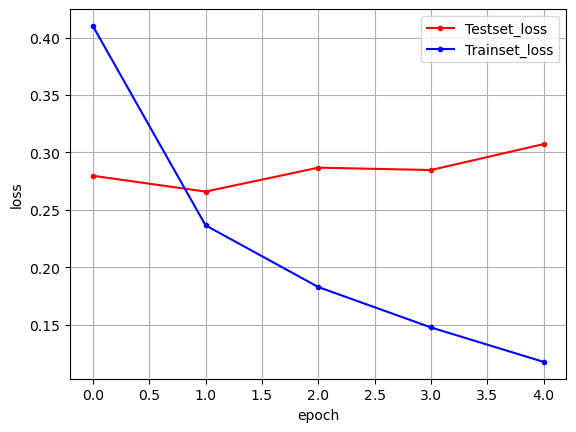

In [ ]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()